In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,f1_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Laptops_cleaned.csv',encoding='ISO-8859-1')
df.head(10)

,Laptop_name,Laptop_price,Rating,Total Ratings,Category,Brand,Model,Ram,Rom,Rom Type,OS,Graphics
0,HP 255 G9 AMD Ryzen 3 Dual Core 3250 - (8 GB/5...,27350.0,4.1,1480,Laptop,HP,255 G9 AMD Ryzen 3 Dual Core 3250,8,512 GB,SSD,Windows,6
1,DELL Inspiron 3530 Intel Core i3 13th Gen N305...,34990.0,4.0,685,Laptop,DELL,Inspiron 3530 Intel Core i3 13th Gen N305,8,256 GB,SSD,Windows,6
2,HP MSO 2024 Intel Core i5 13th Gen 1334U - (16...,54490.0,4.1,297,Laptop,HP,MSO 2024 Intel Core i5 13th Gen 1334U,16,512 GB,SSD,Windows,6
3,HP OMEN Intel Core i7 14th Gen 14650HX - (16 G...,109100.0,4.1,153,Laptop,HP,OMEN Intel Core i7 14th Gen 14650HX,16,1 TB,SSD,Windows,8
4,HP FQ Series Intel Core i3 12th Gen 1215U - (8...,40900.0,3.9,130,Laptop,HP,FQ Series Intel Core i3 12th Gen 1215U,8,1 TB,SSD,Windows,6
5,HP 15s AMD Ryzen 3 Quad Core 5300U - (8 GB/512...,30990.0,4.3,303,Laptop,HP,15s AMD Ryzen 3 Quad Core 5300U,8,512 GB,SSD,Windows,6
6,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,70990.0,4.3,56,Laptop,HP,Victus Intel Core i5 13th Gen 13420H,16,512 GB,SSD,Windows,6
7,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,75142.0,4.0,143,Laptop,HP,Victus Intel Core i5 13th Gen 13420H,16,512 GB,SSD,Windows,4
8,HP Victus AMD Ryzen 7 Octa Core 8845HS - (16 G...,113320.0,4.3,31,Laptop,HP,Victus AMD Ryzen 7 Octa Core 8845HS,16,1 TB,SSD,Windows,6
9,HP Omen Intel Core i7 13th Gen 13620H - (16 GB...,115990.0,4.0,10,Laptop,HP,Omen Intel Core i7 13th Gen 13620H,16,1 TB,SSD,Windows,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Laptop_name    231 non-null    object 
 1   Laptop_price   231 non-null    float64
 2   Rating         231 non-null    float64
 3   Total Ratings  231 non-null    int64  
 4   Category       231 non-null    object 
 5   Brand          231 non-null    object 
 6   Model          231 non-null    object 
 7   Ram            231 non-null    int64  
 8   Rom            231 non-null    object 
 9   Rom Type       231 non-null    object 
 10  OS             231 non-null    object 
 11  Graphics       231 non-null    int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 21.8+ KB


In [5]:
df.describe()

,Laptop_price,Rating,Total Ratings,Ram,Graphics
count,231.000000,231.000000,231.000000,231.000000,231.000000
mean,72226.922078,4.168831,700.411255,13.367965,6.077922
std,43595.740504,0.237520,1992.253570,4.397491,0.956891
min,9999.000000,3.400000,3.000000,4.000000,4.000000
25%,38599.500000,4.000000,47.000000,8.000000,6.000000
50%,58999.000000,4.200000,153.000000,16.000000,6.000000
75%,95746.000000,4.300000,480.500000,16.000000,6.000000
max,239990.000000,5.000000,18981.000000,32.000000,12.000000


In [6]:
df.isnull().sum()

Laptop_name      0
Laptop_price     0
Rating           0
Total Ratings    0
Category         0
Brand            0
Model            0
Ram              0
Rom              0
Rom Type         0
OS               0
Graphics         0
dtype: int64

In [7]:
duplicates = df[df.duplicated()]
duplicates

,Laptop_name,Laptop_price,Rating,Total Ratings,Category,Brand,Model,Ram,Rom,Rom Type,OS,Graphics
24,HP MSO 2024 Intel Core i5 13th Gen 1334U - (16...,54490.0,4.1,297,Laptop,HP,MSO 2024 Intel Core i5 13th Gen 1334U,16,512 GB,SSD,Windows,6
25,HP OMEN Intel Core i7 14th Gen 14650HX - (16 G...,109100.0,4.1,153,Laptop,HP,OMEN Intel Core i7 14th Gen 14650HX,16,1 TB,SSD,Windows,8
30,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,70990.0,4.3,56,Laptop,HP,Victus Intel Core i5 13th Gen 13420H,16,512 GB,SSD,Windows,6
31,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,75142.0,4.0,143,Laptop,HP,Victus Intel Core i5 13th Gen 13420H,16,512 GB,SSD,Windows,4
34,HP OMEN AI PC OLED Intel Core Ultra 7 155H - (...,191668.0,4.1,38,Laptop,HP,OMEN AI PC OLED Intel Core Ultra 7 155H,16,1 TB,SSD,Windows,8
...,...,...,...,...,...,...,...,...,...,...,...,...
216,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,75142.0,4.0,143,Laptop,HP,Victus Intel Core i5 13th Gen 13420H,16,512 GB,SSD,Windows,4
219,HP OMEN AI PC OLED Intel Core Ultra 7 155H - (...,191668.0,4.1,38,Laptop,HP,OMEN AI PC OLED Intel Core Ultra 7 155H,16,1 TB,SSD,Windows,8
220,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,95746.0,4.2,54,Laptop,HP,Victus Intel Core i5 13th Gen 13420H,16,512 GB,SSD,Windows,6
225,CHUWI Intel Core i3 12th Gen Intel Core i3-121...,29990.0,4.0,165,Laptop,CHUWI,Intel Core i3 12th Gen Intel Core i3,12,512 GB,SSD,Windows,6


In [8]:
df.duplicated().sum()


np.int64(73)

In [9]:
df = df.drop_duplicates()

In [ ]:
df.to_csv('laptops_no_duplicates.csv',index=False)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 230
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Laptop_name    158 non-null    object 
 1   Laptop_price   158 non-null    float64
 2   Rating         158 non-null    float64
 3   Total Ratings  158 non-null    int64  
 4   Category       158 non-null    object 
 5   Brand          158 non-null    object 
 6   Model          158 non-null    object 
 7   Ram            158 non-null    int64  
 8   Rom            158 non-null    object 
 9   Rom Type       158 non-null    object 
 10  OS             158 non-null    object 
 11  Graphics       158 non-null    int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 16.0+ KB


In [10]:
df.drop('Laptop_name ',axis=1,inplace=True)

In [16]:
print(df.columns.tolist())



['Laptop_name ', 'Laptop_price', 'Rating', 'Total Ratings', 'Category', 'Brand', 'Model', 'Ram', 'Rom', 'Rom Type', 'OS', 'Graphics']


In [16]:
print(df.columns.tolist())

['Laptop_price', 'Rating', 'Total Ratings', 'Category', 'Brand', 'Model', 'Ram', 'Rom', 'Rom Type', 'OS', 'Graphics']


Text(0.5, 1.0, 'Histogram for Price Distribution')

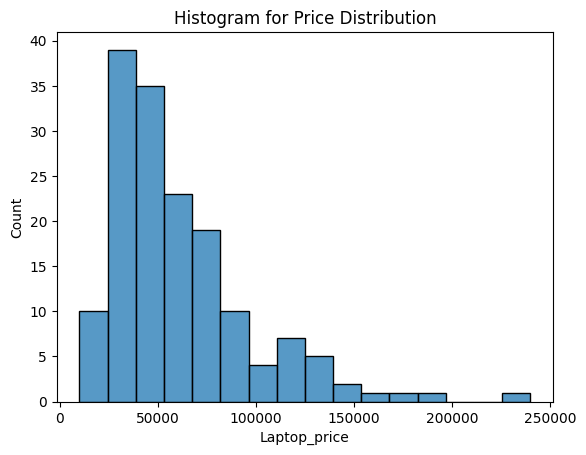

In [17]:
sns.histplot(data=df,x='Laptop_price')
plt.title('Histogram for Price Distribution')

Text(0.5, 1.0, 'Boxplot-Price')

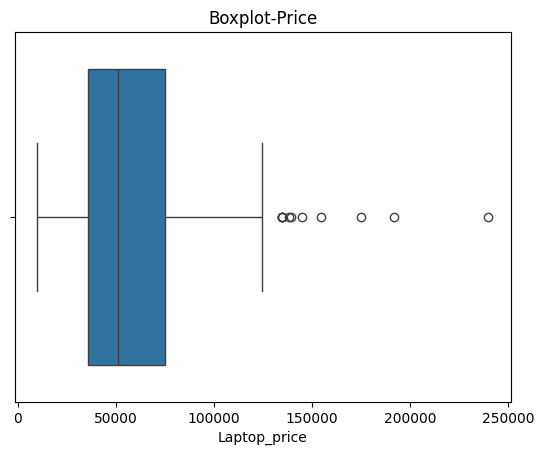

In [18]:
sns.boxplot(data=df,x='Laptop_price')
plt.title('Boxplot-Price')

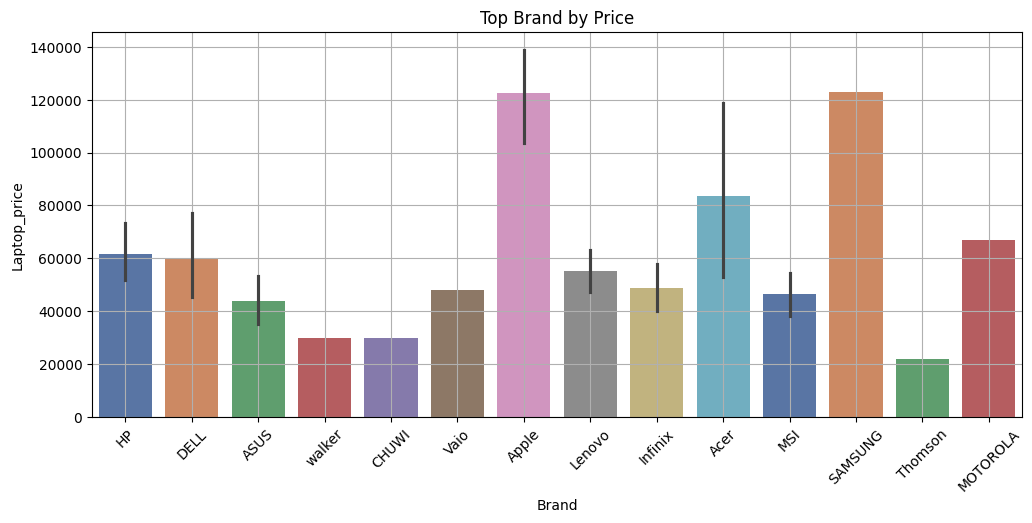

In [20]:
plt.figure(figsize=(12,5))
sns.barplot(y='Laptop_price',x='Brand',data=df,hue='Brand',palette='deep')
plt.xticks(rotation=45)
plt.title('Top Brand by Price')
plt.grid(True)
plt.show()

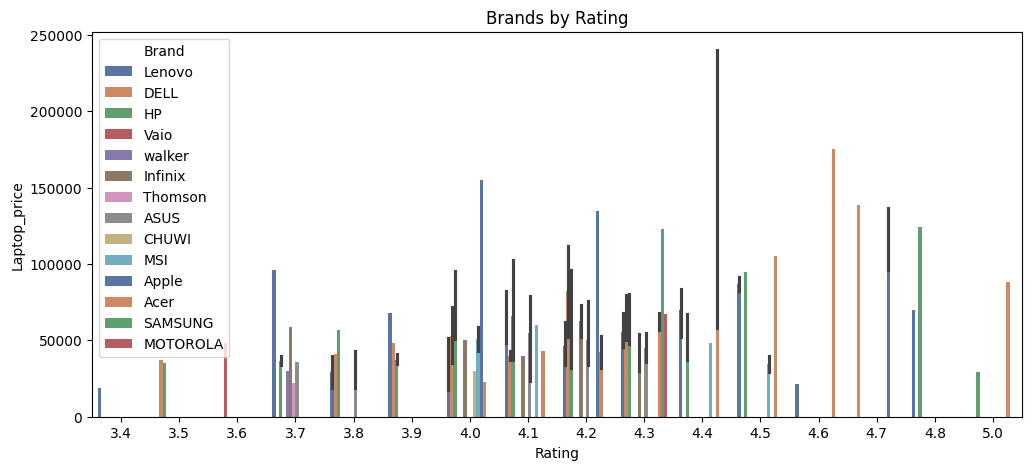

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(y='Laptop_price',x='Rating',data=df,hue='Brand',palette='deep')
plt.title('Brands by Rating')
plt.show()

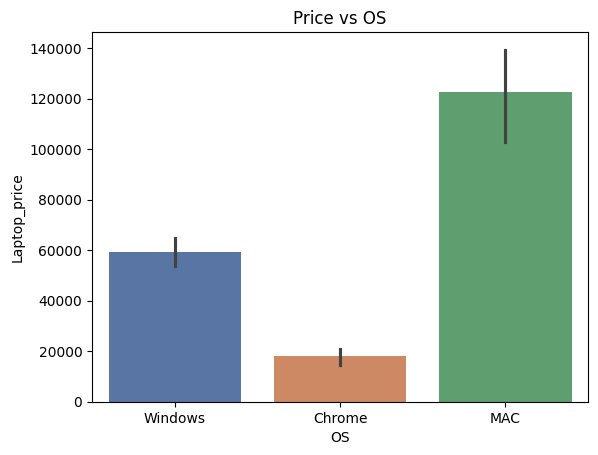

In [22]:
sns.barplot(y='Laptop_price',x='OS',data=df,palette='deep')
plt.title('Price vs OS')
plt.show()

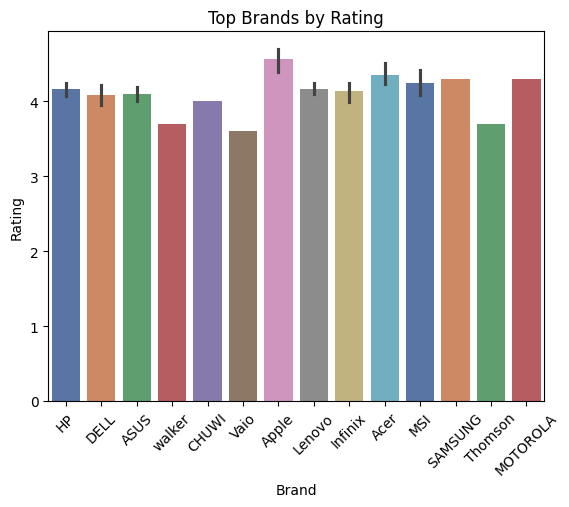

In [23]:
sns.barplot(x='Brand',y='Rating',data=df,palette='deep')
plt.xticks(rotation=45)
plt.title('Top Brands by Rating')
plt.show()

In [24]:
model_price=df.groupby('Model')['Laptop_price'].mean()
model_price_sort=model_price.sort_values(ascending=False).head(5)
model_price_sort.reset_index()

,Model,Laptop_price
0,Predator Helios 16 Intel Core i9 14th Gen 1490...,207490.0
1,OMEN AI PC OLED Intel Core Ultra 7 155H,191668.0
2,Apple M3,144900.0
3,MacBook Air Apple M3,132900.0
4,Omen Intel Core i7 13th Gen 13620H,127689.5


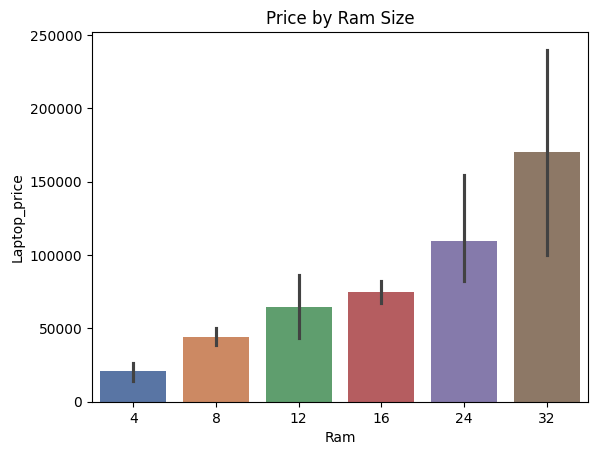

In [25]:
sns.barplot(y='Laptop_price',x='Ram',data=df,palette='deep')
plt.title('Price by Ram Size')
plt.show()

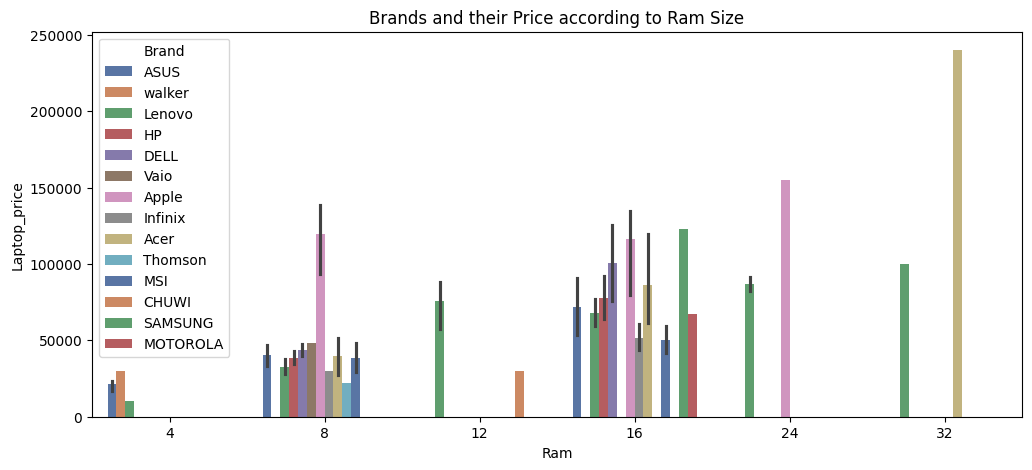

In [26]:
plt.figure(figsize=(12,5))
sns.barplot(y='Laptop_price',x='Ram',data=df,hue='Brand',palette='deep')
plt.title('Brands and their Price according to Ram Size')
plt.show()

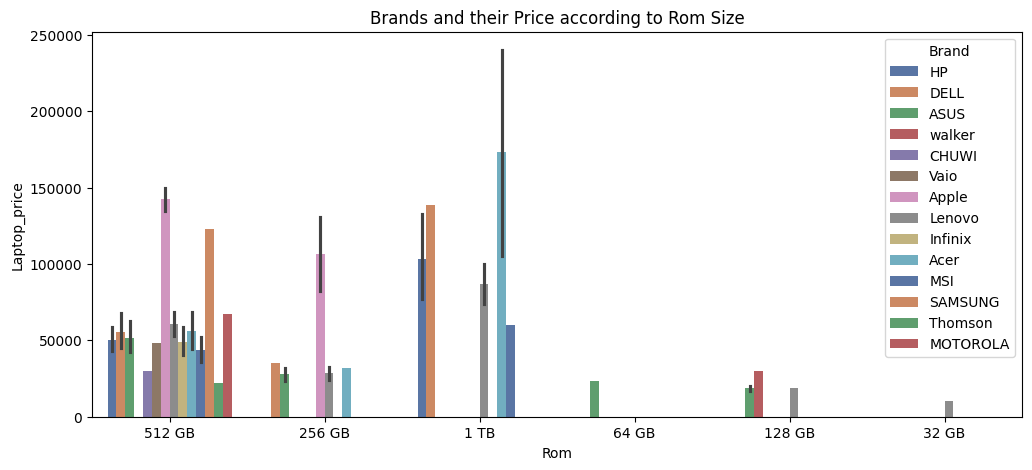

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(y='Laptop_price',x='Rom',data=df,hue='Brand',palette='deep')
plt.title('Brands and their Price according to Rom Size')
plt.show()

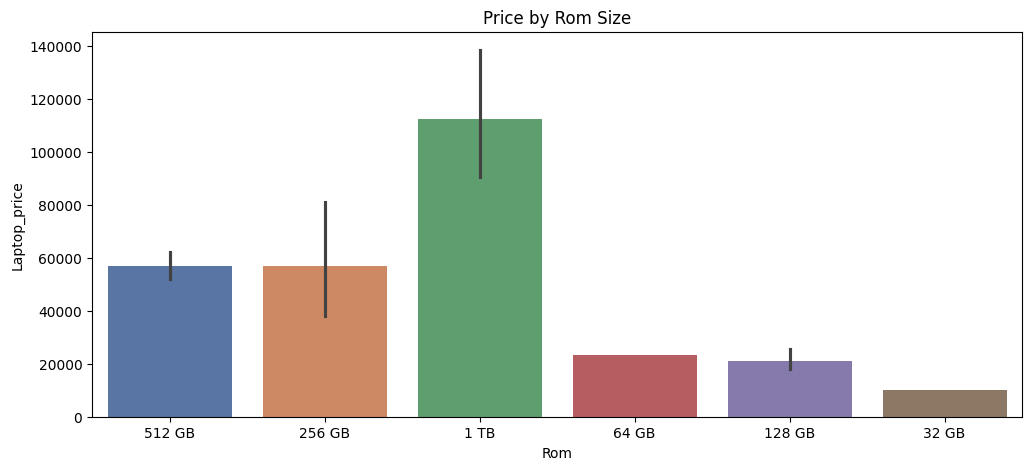

In [28]:
plt.figure(figsize=(12,5))
sns.barplot(y='Laptop_price',x='Rom',data=df,palette='deep')
plt.title('Price by Rom Size')
plt.show()

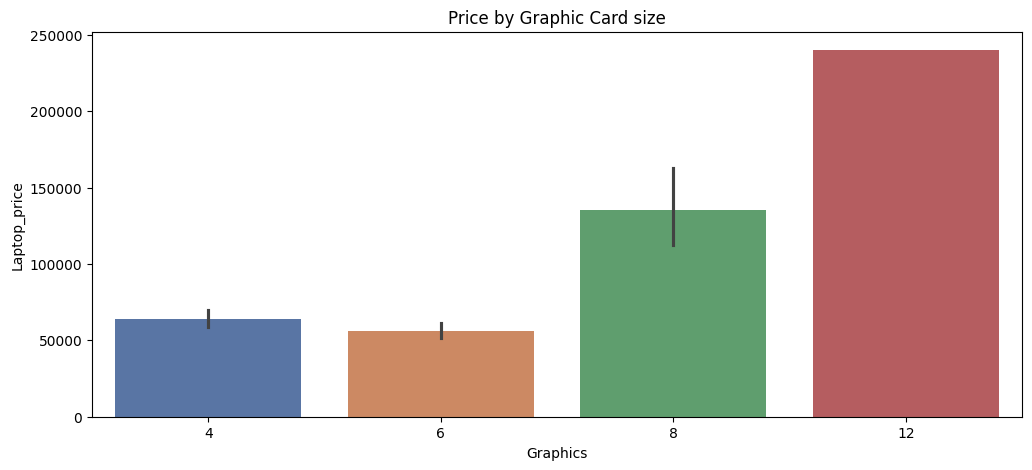

In [29]:
plt.figure(figsize=(12,5))
sns.barplot(y='Laptop_price',x='Graphics',data=df,palette='deep')
plt.title('Price by Graphic Card size')
plt.show()

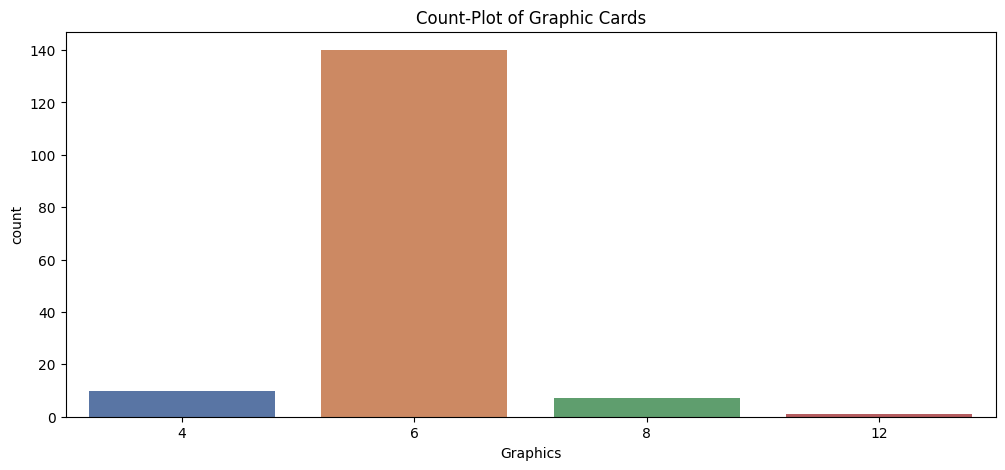

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(x='Graphics',data=df,palette='deep')
plt.title('Count-Plot of Graphic Cards')
plt.show()

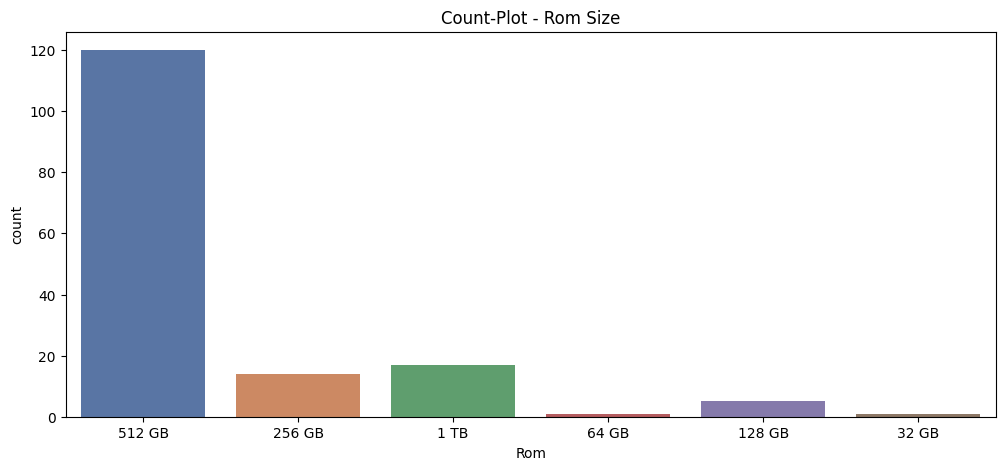

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x='Rom',data=df,palette='deep')
plt.title('Count-Plot - Rom Size')
plt.show()

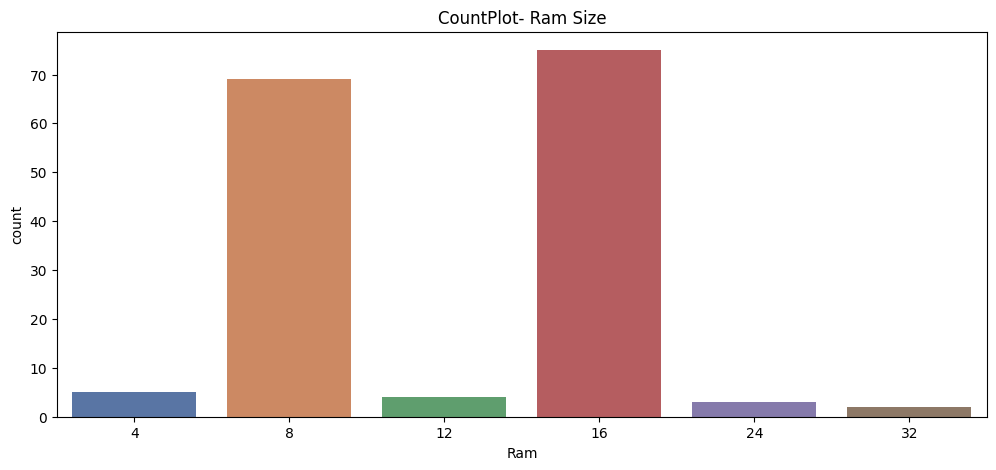

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x='Ram',data=df,palette='deep')
plt.title('CountPlot- Ram Size')
plt.show()

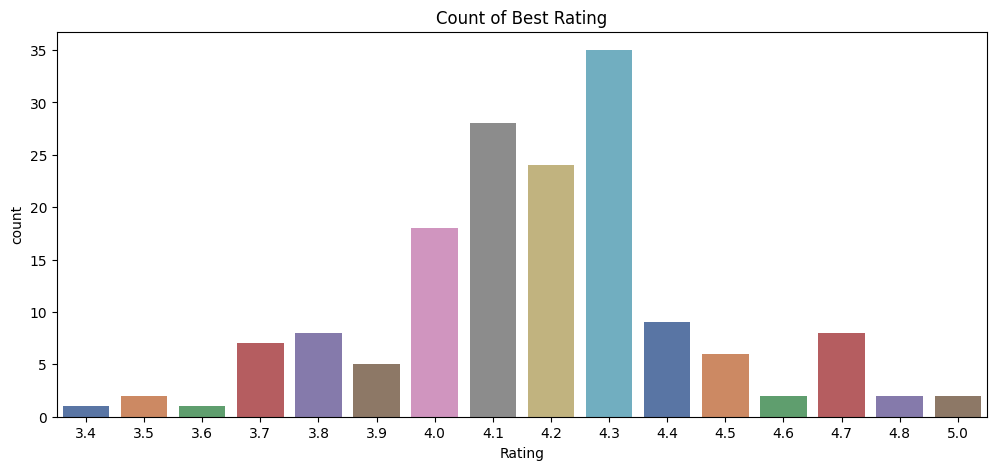

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(x='Rating',data=df,palette='deep')
plt.title('Count of Best Rating')
plt.show()

In [34]:
brand_by_rating=df.groupby('Brand')['Rating'].mean()
brand_by_rating.sort_values(ascending=False).reset_index()

,Brand,Rating
0,Apple,4.566667
1,Acer,4.358333
2,SAMSUNG,4.300000
3,MOTOROLA,4.300000
4,MSI,4.250000
5,Lenovo,4.171429
6,HP,4.164286
7,Infinix,4.137500
8,ASUS,4.105263
9,DELL,4.085714


In [36]:
brand_by_total_reviews=df.groupby('Brand')['Total Ratings'].mean()
brand_by_total_reviews.sort_values(ascending=False).reset_index()

,Brand,Total Ratings
0,Apple,4342.888889
1,ASUS,2082.052632
2,walker,1548.000000
3,Acer,1313.000000
4,HP,666.690476
5,Lenovo,555.309524
6,Infinix,228.625000
7,Vaio,197.000000
8,DELL,180.714286
9,CHUWI,165.000000


In [37]:
brand_by_rating=df.groupby('Brand')['Rating'].mean()
brand_by_rating.sort_values(ascending=False).reset_index()

,Brand,Rating
0,Apple,4.566667
1,Acer,4.358333
2,SAMSUNG,4.300000
3,MOTOROLA,4.300000
4,MSI,4.250000
5,Lenovo,4.171429
6,HP,4.164286
7,Infinix,4.137500
8,ASUS,4.105263
9,DELL,4.085714


Text(0.5, 1.0, 'Price- Rating')

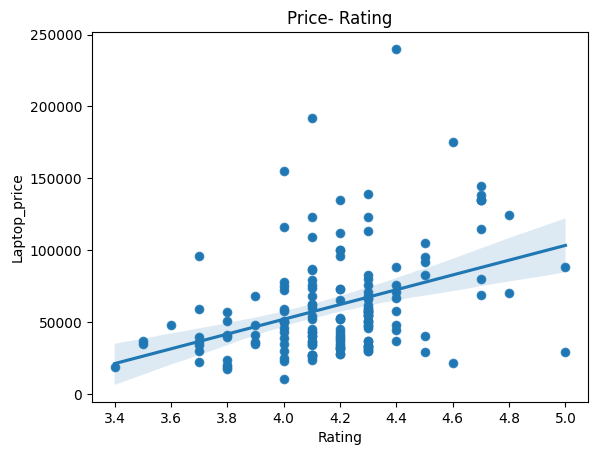

In [38]:
sns.scatterplot(x='Rating',y='Laptop_price',data=df)
sns.regplot(data=df, y='Laptop_price', x='Rating')
plt.title('Price- Rating')

Function to find Worst and Best Models of Brands

In [11]:
def get_best_and_worst_laptops(df, brand_name):
    # Filter DataFrame for the given brand
    brand_df = df[df['Brand'].str.lower() == brand_name.lower()]
    
    if brand_df.empty:
        return f"No laptops found for brand '{brand_name}'"

    # Get best-rated laptop
    best = brand_df.loc[brand_df['Rating'].idxmax()]

    # Get worst-rated laptop
    worst = brand_df.loc[brand_df['Rating'].idxmin()]

    return best, worst


In [27]:
best_lap, worst_lap = get_best_and_worst_laptops(df, 'VAIO')

print("Best Rated  Laptop:")
print(best_lap)
print()
print("Worst Rated  Laptop:")
print(worst_lap)


Best Rated  Laptop:
Laptop_price                                   47999.0
Rating                                             3.6
Total Ratings                                      197
Category                                        Laptop
Brand                                             Vaio
Model            E Series AMD Ryzen 7 Quad Core 3700U 
Ram                                                  8
Rom                                             512 GB
Rom Type                                           SSD
OS                                             Windows
Graphics                                             6
Name: 20, dtype: object

Worst Rated  Laptop:
Laptop_price                                   47999.0
Rating                                             3.6
Total Ratings                                      197
Category                                        Laptop
Brand                                             Vaio
Model            E Series AMD Ryzen 7 Quad Core 3700U 

In [47]:
df.to_csv('laptops_no_duplicates_simpler.csv',index=False)

In [23]:
df=pd.read_csv('laptops_no_duplicates_simpler.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Laptop_price   158 non-null    float64
 1   Rating         158 non-null    float64
 2   Total Ratings  158 non-null    int64  
 3   Category       158 non-null    object 
 4   Brand          158 non-null    object 
 5   Model          158 non-null    object 
 6   Ram            158 non-null    int64  
 7   Rom            158 non-null    object 
 8   Rom Type       158 non-null    object 
 9   OS             158 non-null    object 
 10  Graphics       158 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 13.7+ KB


In [24]:
df=df.drop(columns=['Model','Category'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Laptop_price   158 non-null    float64
 1   Rating         158 non-null    float64
 2   Total Ratings  158 non-null    int64  
 3   Brand          158 non-null    object 
 4   Ram            158 non-null    int64  
 5   Rom            158 non-null    object 
 6   Rom Type       158 non-null    object 
 7   OS             158 non-null    object 
 8   Graphics       158 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 11.2+ KB


Text(0.5, 1.0, 'Heat map-Correlation')

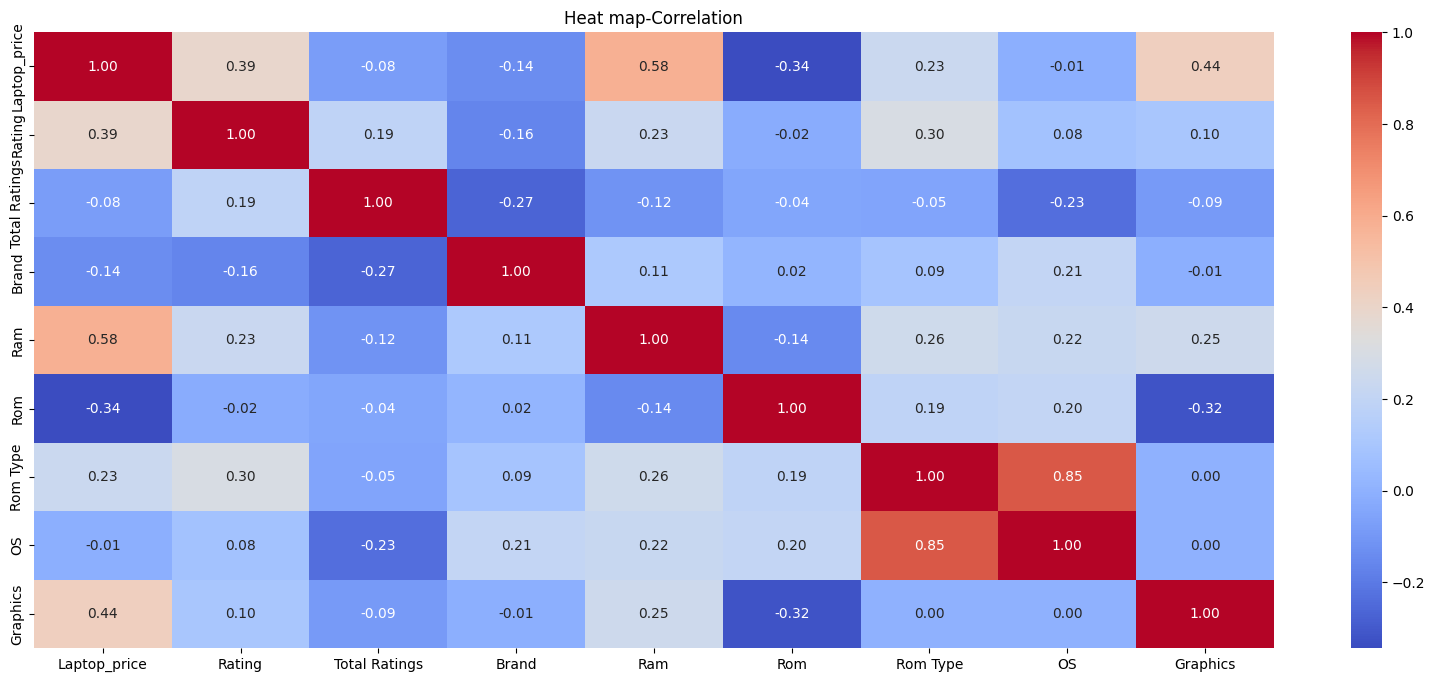

In [7]:
plt.figure(figsize=(20,8))
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heat map-Correlation')

ENCODING

In [25]:
label_encoders = {}
for col in ['Ram','Rom','OS']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df['Brand']=df['Brand'].map({'HP':0,
'DELL':1,'ASUS':2
,'walker':3
,'CHUWI':4
,'Vaio':5
,'Apple':6
,'Lenovo':7
,'Infinix':8
,'Acer':9
,'MSI':10
,'SAMSUNG':11
,'Thomson':12
,'MOTOROLA':13
})
df['Rom Type']=df['Rom Type'].map({'SSD':0,'EMMC':1})

In [5]:
df

,Laptop_price,Rating,Total Ratings,Brand,Ram,Rom,Rom Type,OS,Graphics
0,27350.0,4.1,1480,0,1,4,0,2,6
1,34990.0,4.0,685,1,1,2,0,2,6
2,54490.0,4.1,297,0,3,4,0,2,6
3,109100.0,4.1,153,0,3,0,0,2,8
4,40900.0,3.9,130,0,1,0,0,2,6
...,...,...,...,...,...,...,...,...,...
153,50990.0,4.0,4,1,1,4,0,2,6
154,21490.0,4.6,7,7,1,2,0,2,6
155,42990.0,4.2,711,7,1,4,0,2,6
156,44990.0,4.1,386,0,1,4,0,2,6


Text(0.5, 1.0, 'Heat map-Correlation')

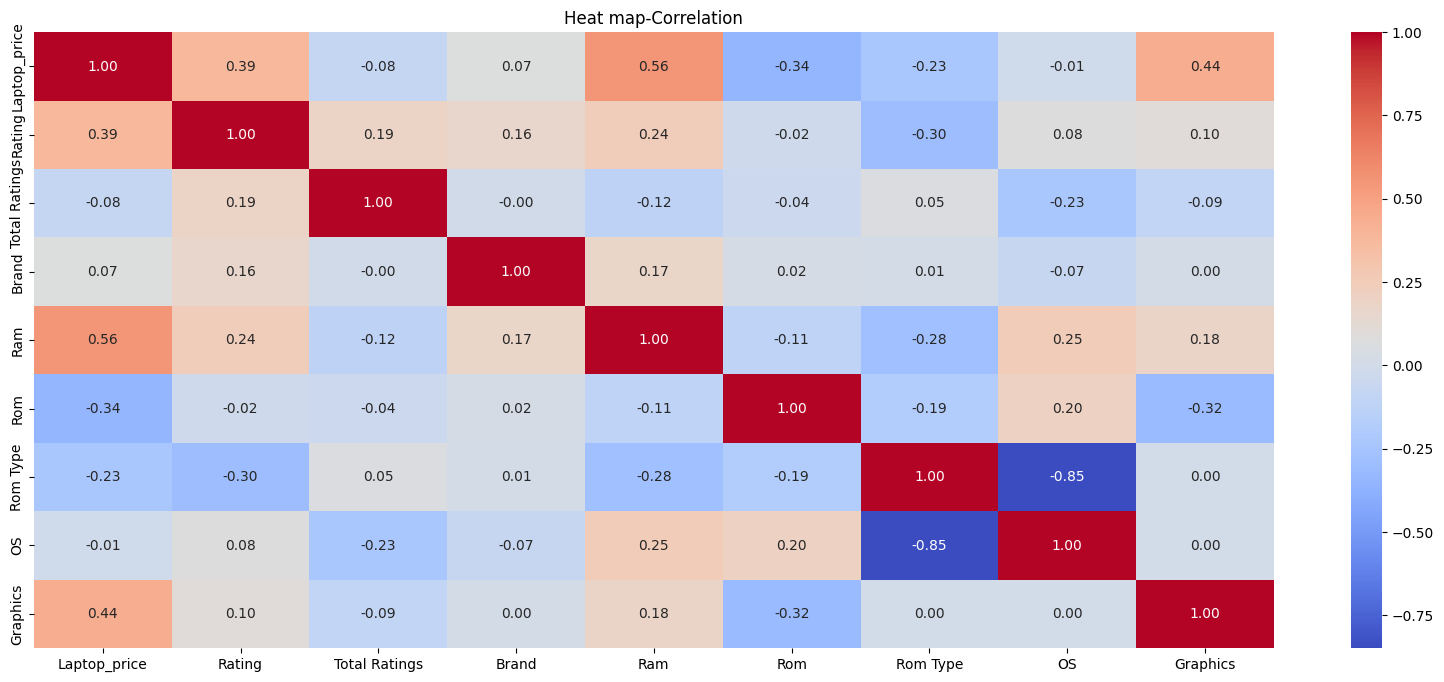

In [37]:
plt.figure(figsize=(20,8))
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heat map-Correlation')

In [38]:
df.isnull().sum()

Laptop_price     0
Rating           0
Total Ratings    0
Brand            0
Ram              0
Rom              0
Rom Type         0
OS               0
Graphics         0
dtype: int64

DATA SPLITING

In [6]:
x= df.drop(columns=['Rom'])  
y = df['Rom']

In [7]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

LOGISTIC REGRESSION

In [9]:
logreg= LogisticRegression()
logreg.fit(x_train, y_train)  
y_pred= logreg.predict(x_test)  

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

test_accuracy=logreg.score(x_test, y_test)
train_accuracy=logreg.score(x_train, y_train)
print('Training Accuracy: ',train_accuracy)
print('Test Accuracy: ',test_accuracy)
print('classification report: ')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.78125
Training Accuracy:  0.873015873015873
Test Accuracy:  0.78125
classification report: 
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           4       0.81      0.92      0.86        24

    accuracy                           0.78        32
   macro avg       0.39      0.38      0.38        32
weighted avg       0.73      0.78      0.75        32



Logistic Regression-Tunning

In [12]:
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=10, n_jobs=-1, verbose=4)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best hyperparameters: ',best_params)
print('Best cross-validation accuracy: ',best_score)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best hyperparameters:  {'C': 1}
Best cross-validation accuracy:  0.8179487179487179


In [13]:
final_log_model =LogisticRegression(C=1)  
final_log_model.fit(x_train, y_train)
y_pred_log = final_log_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_log)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.78125


SVM MODEL

In [14]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

test_accuracy = svm.score(x_test, y_test)
print('classification report: ')
print(classification_report(y_test,y_pred_svm))
print('Test Accuracy: ',test_accuracy)

SVM Accuracy: 0.8125
classification report: 
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           4       0.82      0.96      0.88        24

    accuracy                           0.81        32
   macro avg       0.39      0.39      0.39        32
weighted avg       0.73      0.81      0.77        32

Test Accuracy:  0.8125


SVM-Tunning

In [15]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto']  }
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=10, n_jobs=-1, verbose=4)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best hyperparameters: ',best_params)
print('Best cross-validation accuracy: ',best_score)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best hyperparameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy:  0.8012820512820513


In [16]:
final_model = SVC(C=1, kernel='linear', gamma='scale')  
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8125


RF-MODEL

In [46]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           4       0.81      0.88      0.84        24

    accuracy                           0.75        32
   macro avg       0.35      0.37      0.36        32
weighted avg       0.70      0.75      0.72        32



RF-Tunning

In [68]:
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'],'bootstrap': [True, False]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=10, n_jobs=-1, verbose=4)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print('Best hyperparameters: ',best_params)
print('Best cross-validation accuracy: ',best_score)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best hyperparameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy:  0.8487179487179487


In [69]:
best_params = grid_search.best_params_
final_model_rf = RandomForestClassifier(**best_params) 
final_model_rf.fit(x_train, y_train)
final_y_pred_rf = final_model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, final_y_pred_rf)
print("Test Accuracy:", accuracy_rf)
print(classification_report(y_test,final_y_pred_rf))

Test Accuracy: 0.71875
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           4       0.80      0.83      0.82        24

    accuracy                           0.72        32
   macro avg       0.33      0.36      0.34        32
weighted avg       0.68      0.72      0.70        32



KNN-MODEL

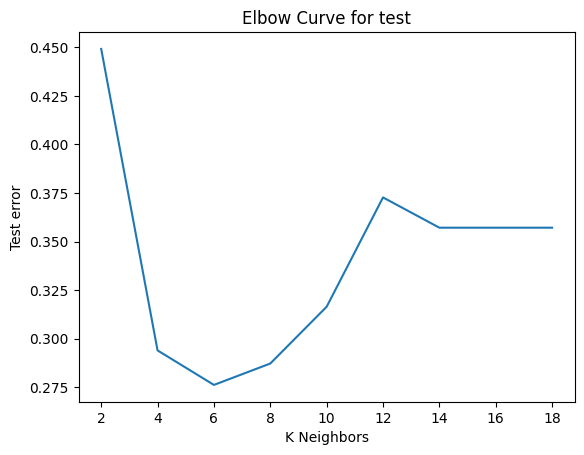

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(x_train, y_train) 
y_pred_knn = knn.predict(x_test) 
def Elbow(K):
    test_error = []
    for i in K:
        clf = KNeighborsClassifier(n_neighbors = i)
        clf.fit(x_train,y_train)
        tmp = clf.predict(x_test)
        tmp = f1_score(y_test, tmp, average='weighted')
        error = 1-tmp
        test_error.append(error)
    return test_error
k = range(2, 20, 2)
test = Elbow(k)
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14)  
knn.fit(x_train, y_train) 
y_pred_knn = knn.predict(x_test) 

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print('classification report: ')
print(classification_report(y_test,y_pred_knn))

KNN Accuracy: 0.75
classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           4       0.75      1.00      0.86        24

    accuracy                           0.75        32
   macro avg       0.19      0.25      0.21        32
weighted avg       0.56      0.75      0.64        32



XG-Boost Model

In [26]:
import xgboost as xgb
xgboost_model= xgb.XGBClassifier(n_jobs=-1)
xgboost_model.fit(x_train, y_train)  
y_pred_xgb=xgboost_model.predict(x_test)  
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print('Classification Report: ')
print(classification_report(y_test,y_pred_xgb))

XGBoost Accuracy: 0.71875
Classification Report: 
              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           4       0.83      0.83      0.83        24

    accuracy                           0.72        32
   macro avg       0.32      0.36      0.33        32
weighted avg       0.69      0.72      0.70        32



In [58]:
features1 =['Laptop_price','Rating','Total Ratings','Brand','Ram','Rom Type',	'OS','Graphics']
importance_df = pd.DataFrame({
    'Feature': features1,
    'Importance': xgboost_model.feature_importances_})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

         Feature  Importance
5       Rom Type    0.405015
0   Laptop_price    0.160275
1         Rating    0.108476
2  Total Ratings    0.099262
4            Ram    0.094135
3          Brand    0.052058
7       Graphics    0.044858
6             OS    0.035922


new data splitting for xgboost after feature importance

In [20]:
x= df.drop(columns=['Rom','Graphics','OS','Brand','Ram']) 
y = df['Rom']
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [21]:
import xgboost as xgb
xgboost_model= xgb.XGBClassifier(n_jobs=-1)
xgboost_model.fit(x_train, y_train)  
y_pred_xgb=xgboost_model.predict(x_test)  
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print('Classification Report: ')
print(classification_report(y_test,y_pred_xgb))

XGBoost Accuracy: 0.71875
Classification Report: 
              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           4       0.83      0.83      0.83        24

    accuracy                           0.72        32
   macro avg       0.32      0.36      0.33        32
weighted avg       0.69      0.72      0.70        32



XGB-TUUNING

In [28]:
params = {
        'n_estimators' : [100, 200, 500, 750], 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25], 
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 10
xgboost = RandomizedSearchCV(xgboost_model, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=3, verbose=3, random_state=42)

xgboost.fit(x_train, y_train)

best_params = xgboost.best_params_
xgboosting = xgb.XGBClassifier(**best_params)
xgboosting.fit(x_train,y_train)

pred_hpt = xgboosting.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test,pred_hpt))
print('Classification Report: ')
print(classification_report(y_test,pred_hpt))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
XGBoost Accuracy: 0.8125
Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           4       0.82      0.96      0.88        24

    accuracy                           0.81        32
   macro avg       0.39      0.39      0.39        32
weighted avg       0.73      0.81      0.77        32



UNSUPERVISED LEARNING

K-Means clustering

In [83]:
kmeans = KMeans(n_clusters=2, 
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=0)
kmeans.fit(x)

KMeans(n_clusters=2, n_init=10, random_state=0)

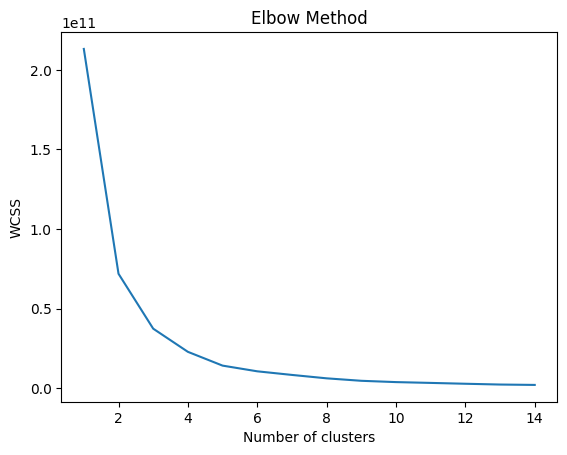

In [86]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [87]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(x, kmeans.labels_)

print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5018617204020366


In [88]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [90]:
pred_y = kmeans.fit_predict(x)
df['Cluster'] = pred_y

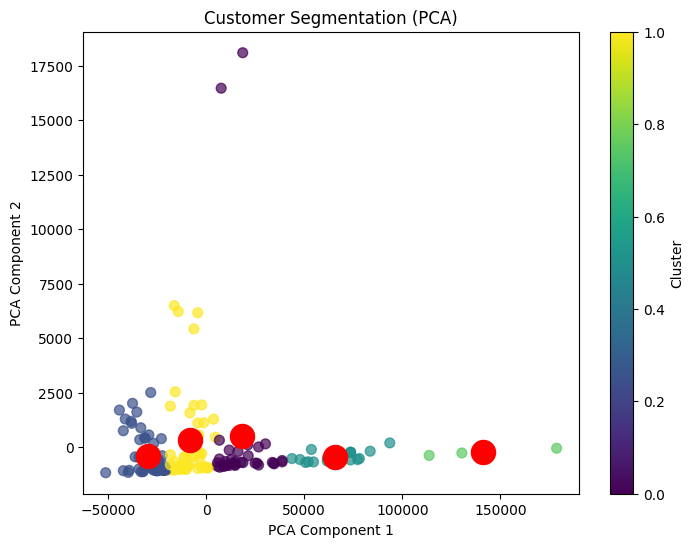

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red',  label='Centroids')
plt.title('Customer Segmentation (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

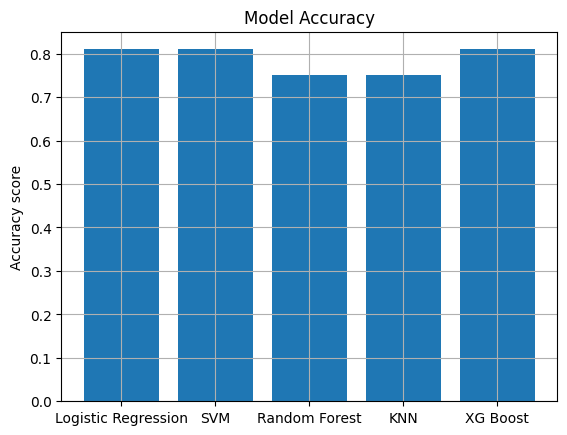

In [99]:
values=[0.81,0.81,0.75,0.75,0.81]
model=['Logistic Regression','SVM','Random Forest','KNN','XG Boost']
import matplotlib.pyplot as plt
plt.bar(model,values)
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.grid(True)
plt.show()

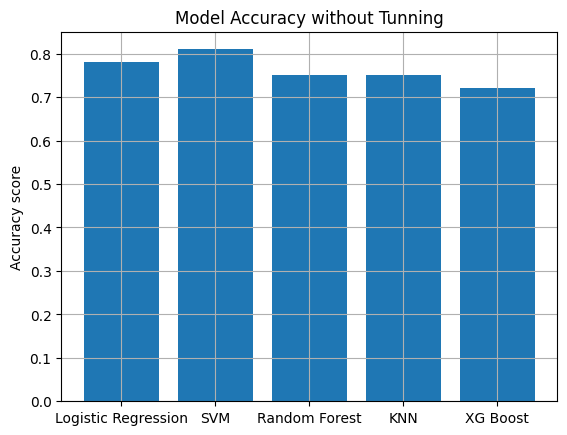

In [101]:
values=[0.78,0.81,0.75,0.75,0.72]
model=['Logistic Regression','SVM','Random Forest','KNN','XG Boost']
import matplotlib.pyplot as plt
plt.bar(model,values)
plt.ylabel('Accuracy score')
plt.title('Model Accuracy without Tunning')
plt.grid(True)
plt.show()